## TestCase: Check for the parameter numbers for each 1D-CNN blocks and proceed with deciding their total number

In [218]:
# Importing important packages
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers

- The block above contains three hyperparameter tuning layers for more control over future instances.
- Apart from that, numbers of blocks needed to be implemented is still a long shot.

- Considering the total number of trainable parameters, we need to do some modifications and research to find if the number makes sense.
-  Designing Bi-LSTM layer is not much of a concern since most of the idea of their efficiency is negligible and its worth relying on the trail and error ideology to test which architecture is actually reliable.
- Consider using dropouts:
    - before output fully connected layer.
    - after 1D CNN layer and before the flatten layer in 1D CNN block (if implemented) 
    - after flatten layer in the classification overhead
- Consider using Batch Normalisation layers:
    - After the 1D convolution layer.
- Note: **Avoid using batch normalisation in RNN blocks!**

In [219]:
# create 2 1D CNN blocks -> see learnable parameters

# Input layers
InputLayer = layers.Input(shape=(1000,12))

# 1D-CNN Block 1
conv1d_1 = layers.Conv1D(filters = 12, 
                                kernel_size = 5, # Usual default
                                strides = 1, # Usual default
                                activation = "relu")(InputLayer)
BN_1 = layers.BatchNormalization()(conv1d_1)
MP1d_1 = layers.MaxPool1D(pool_size = 2)(BN_1) # referenced usual default for ptbxl
DropOut_1 = layers.Dropout(0.5)(MP1d_1) # referenced usual default for ptbxl

# 1D-CNN Block 2
conv1d_2 = layers.Conv1D(filters = 12, 
                                kernel_size = 5, # Usual default
                                strides = 1, # Usual default
                                activation = "relu")(DropOut_1)
BN_2 = layers.BatchNormalization()(conv1d_2)
MP1d_2 = layers.MaxPool1D(pool_size = 2)(BN_2) # referenced usual default for ptbxl
DropOut_2 = layers.Dropout(0.5)(MP1d_2)

# Bidirectional LSTM Block 1
Bidirectional_1 = layers.Bidirectional(
    layers.LSTM(64, return_sequences = True))(DropOut_2)

# Bidirectional LSTM Block 2
Bidirectional_2 = layers.Bidirectional(
    layers.LSTM(32))(Bidirectional_1)

# Classification Overhead
Dense_2 = layers.Dense(units = 128,
                      activation = "relu")(Bidirectional_2)
DropOut_Classification = layers.Dropout(0.5)(Dense_2)
OutputLayer = layers.Dense(units = 7,# referenced usual default for ptbxl
                              activation = "sigmoid",# referenced usual default for ptbxl
                              )(DropOut_Classification)

# Model Creation
model = tf.keras.Model(inputs = InputLayer,
                            outputs = OutputLayer,
                            name = "TestCaseModel_Conv_2_Blocks")

# Model Compilation (loss function and optimiser) 
model.compile(optimizer="adam",
                              loss = "BinaryCrossentropy",
                              metrics = ["accuracy"])

In [220]:
model.summary()

Model: "TestCaseModel_Conv_2_Blocks"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1000, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 996, 12)        │           732 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 996, 12)        │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 498, 12)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 498, 12)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 494, 12)        │           732 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 494, 12)        │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 247, 12)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 247, 12)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_20                │ (None, 247, 128)       │        39,424 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,423 (357.12 KB)

 Trainable params: 91,375 (356.93 KB)

 Non-trainable params: 48 (192.00 B)

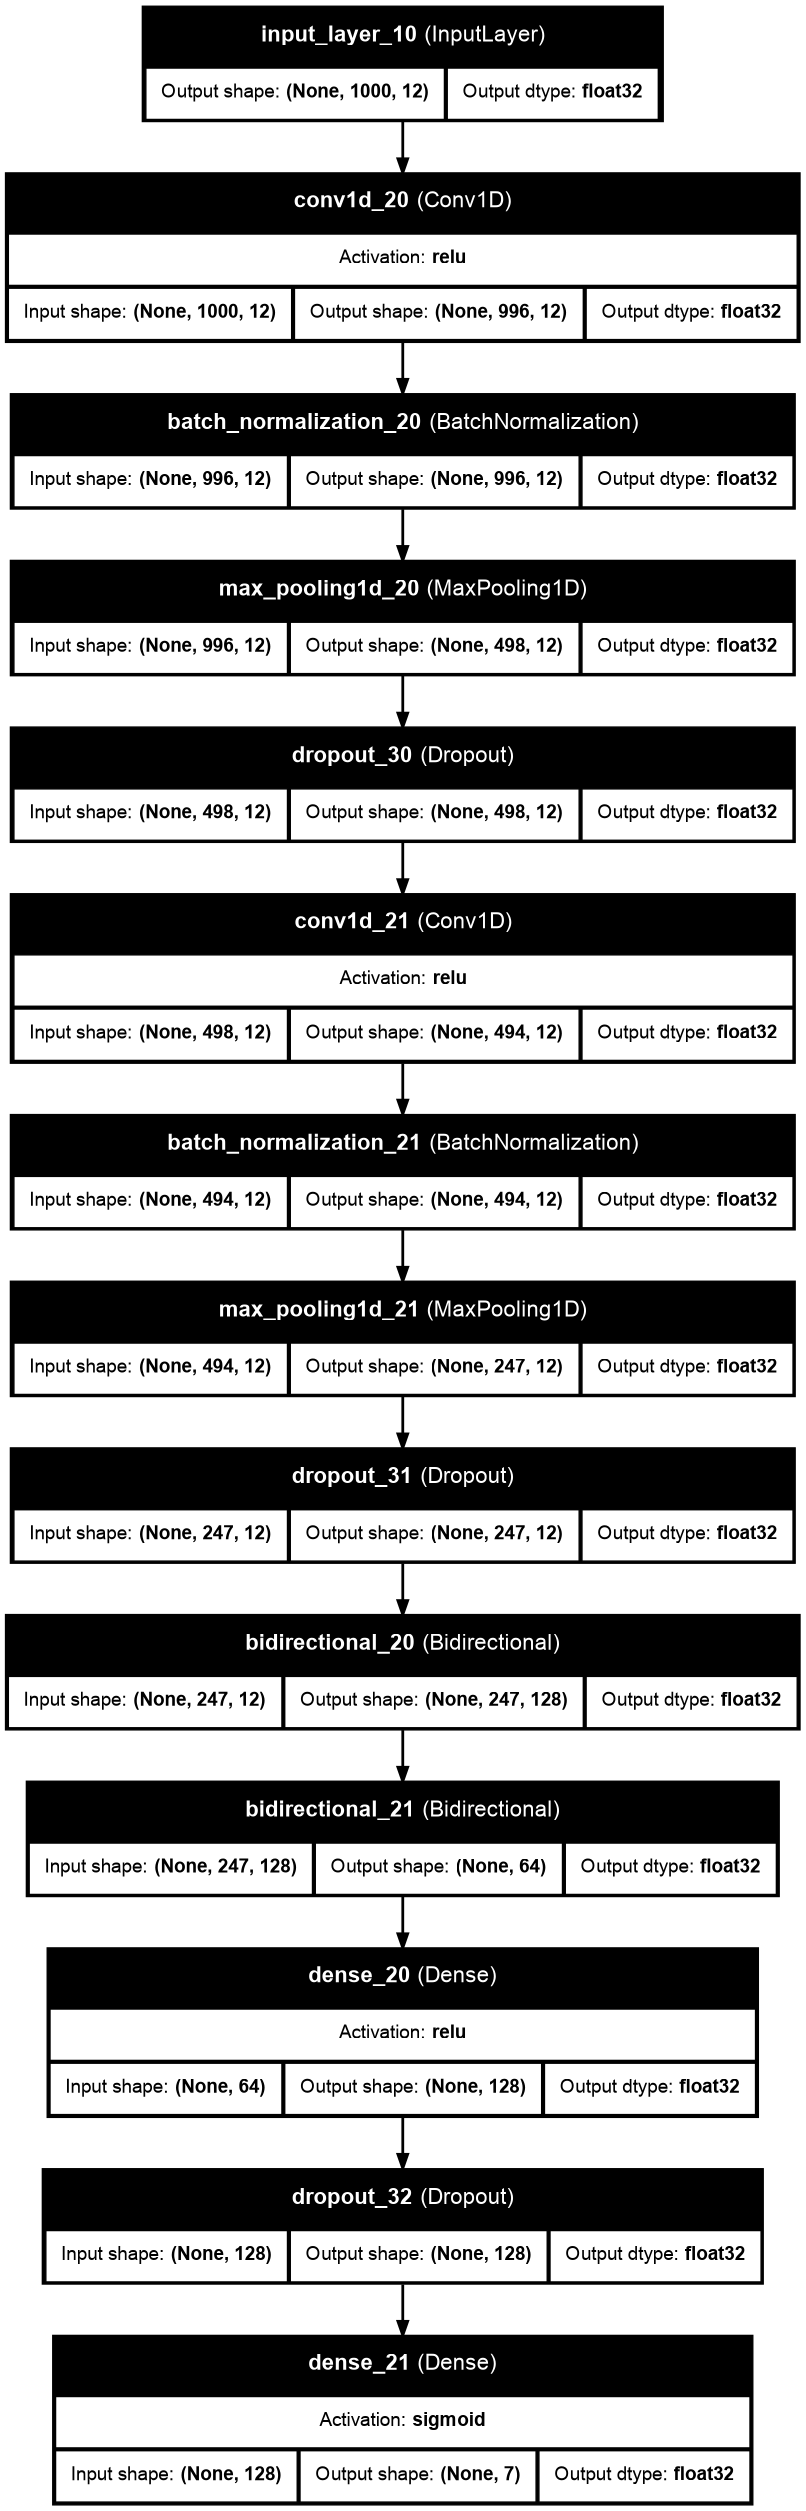

In [221]:
# Visualise The Model

tf.keras.utils.plot_model(model,
                          dpi = 100,
                          to_file = 'Final.png',
                          show_shapes = True,
                          show_dtype = True,
                          show_layer_names = True,
                          show_layer_activations = True)

## De-pickling training data

In [222]:
# load train dependant vars
with open("/home/student/Prathamesh's Project Pre-requisites/CodeSpace/DL/X_TRAIN.pkl", "rb") as f:
    x_train = pickle.load(f)

In [223]:
# load train target vars
with open("/home/student/Prathamesh's Project Pre-requisites/CodeSpace/DL/Y_TRAIN.pkl", "rb") as f:
    y_train = pickle.load(f)

In [224]:
# Check the data
print(f"The shape of dependent variables is {x_train.shape}.")
print(f"The shape of independent variables is {y_train.shape}.")

The shape of dependent variables is (12123, 1000, 12).
The shape of independent variables is (12123,).


In [225]:
# load test dependant vars
with open("/home/student/Prathamesh's Project Pre-requisites/CodeSpace/DL/X_TEST.pkl", "rb") as f:
    x_test = pickle.load(f)

In [226]:
# load test target vars
with open("/home/student/Prathamesh's Project Pre-requisites/CodeSpace/DL/Y_TEST.pkl", "rb") as f:
    y_test = pickle.load(f)

In [227]:
# Check the data
print(f"The shape of dependent variables is {x_test.shape}.")
print(f"The shape of independent variables is {y_test.shape}.")

The shape of dependent variables is (1512, 1000, 12).
The shape of independent variables is (1512,).


The data seems to be correctly loaded!

## Trial Training Session

In [228]:
# x trial batch prep
trial_x_train = tf.cast(x_train, dtype=tf.float32) # for converting the numpy arrays into tensors of float32
print(f"the length for the both must be {len(trial_x_train)}")

# testing data preprocessing
trial_x_test = tf.cast(x_test, dtype = tf.float32)
print(f"The datatype for the testing signal data is {type(x_test)}")
print(f"\nLet us see the first entry:\n {x_test[1]}")
print(f"\nTotal number of signals obtained from patients: {len(x_test)}")

the length for the both must be 12123
The datatype for the testing signal data is <class 'numpy.ndarray'>

Let us see the first entry:
 [[ 0.00809643  0.02118633  0.01307777 ... -0.00297517 -0.00599571
  -0.00397102]
 [ 0.02310487  0.02193361 -0.00116536 ... -0.00250275 -0.00507634
  -0.00340584]
 [ 0.02422108  0.02496292  0.0006977  ... -0.00265434 -0.00244668
  -0.00100723]
 ...
 [ 0.26132209  0.26762413  0.00544839 ...  0.03903596  0.08776658
   0.02479506]
 [ 0.23355836  0.23503972  0.00150268 ...  0.03900548 -0.02465511
   0.0219655 ]
 [ 0.02392498  0.01611293 -0.00769422 ...  0.02712256  0.02170888
   0.01636948]]

Total number of signals obtained from patients: 1512


**Considerations for target variables**

- Convert these pandas series into list.
- Setting up string lookup layer
- Setting up adapt layer (to create adapted vocabulary)
- Convert it

In [229]:
# analyse dtype of y_train
print(f"The data type of train target variables is {type(y_train)}")
print(f"The data type of test target variables is {type(y_test)}")

The data type of train target variables is <class 'pandas.core.series.Series'>
The data type of test target variables is <class 'pandas.core.series.Series'>


In [230]:
# convert into list
y_train = y_train.to_list()
y_test = y_test.to_list()
print(f"The data type of train target variables is {type(y_train)}")
print(f"The data type of test target variables is {type(y_test)}")

The data type of train target variables is <class 'list'>
The data type of test target variables is <class 'list'>


In [231]:
# Analyse
print(y_train[1:10])
print(y_test[1:10])

[['NORM'], ['NORM'], ['NORM'], ['NORM'], ['NORM'], ['NORM'], ['STTC'], ['NORM'], ['NORM']]
[['NORM'], ['CD'], ['NORM'], ['NORM'], ['NORM'], ['NORM'], ['NORM'], ['CD'], ['STTC']]


In [232]:
# y trail batch split
trial_y_train = y_train
print(f"the length for the both must be {len(trial_y_train)}")
trial_y_test = y_test
print(f"the length for the both must be {len(trial_y_test)}")

the length for the both must be 12123
the length for the both must be 1512


In [233]:
# convert the list into a ragged tensor (handles non-rectangular data)
ragged_target_variable_train = tf.ragged.constant(trial_y_train)
ragged_target_variable_test = tf.ragged.constant(trial_y_test)

In [234]:
# String Lookup layer
Str_Lookup_layer = layers.StringLookup(output_mode="multi_hot")
Str_Lookup_layer.adapt(ragged_target_variable_train)
Str_Lookup_layer.adapt(ragged_target_variable_test)
Str_Lookup_layer.get_vocabulary() # see the vocab

['[UNK]',
 np.str_('NORM'),
 np.str_('STTC'),
 np.str_('MI'),
 np.str_('CD'),
 np.str_('HYP'),
 np.str_('HYP_HR')]

In [235]:
# Get the final converted form
trial_y_train = Str_Lookup_layer(ragged_target_variable_train)
trial_y_test = Str_Lookup_layer(ragged_target_variable_test)

In [236]:
len(trial_y_train)
len(trial_y_test)

1512

In [237]:
# test the first entry
print(trial_y_train[7]) # STTC entry
print(trial_y_test[7]) # NORM entry

tf.Tensor([0 0 1 0 0 0 0], shape=(7,), dtype=int64)
tf.Tensor([0 1 0 0 0 0 0], shape=(7,), dtype=int64)


**Notes**

For Epochs:

- small dataset (<10k>) : epochs = 10-50
- medium dataset (10k-100k) : epochs = 20-200
- large datsets (100k+) : epochs = 50-500+
- fine-tuning/pre-trained models : epochs = 3-10

For batch size: (& ^gradient estimate stability & ^convergence & !Generaliastion)

- standard/baseline = 32
- Image Classification  = 32/64/128
- NLP = ~16-32
- Limited Memory/Small dataset = 8/16

In [238]:
# train the model

History = model.fit(
    x = trial_x_train,
    y = trial_y_train,
    epochs = 10,
    batch_size = 128, 
)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.4004 - loss: 0.4490
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.4628 - loss: 0.4073
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.4711 - loss: 0.4034
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.4735 - loss: 0.4014
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.4738 - loss: 0.4000
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.4737 - loss: 0.3999
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.4738 - loss: 0.3990
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.4738 - loss: 0.3991
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.4738 - loss: 0.3981
Epoch 10/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.4738 - loss: 0.3984


In [239]:
# evaluate the model

loss, accuracy = model.evaluate(
    x = trial_x_test,
    y = trial_y_test,
    batch_size = 128   
)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3968 - loss: 0.4559


In [240]:
print(f"Loss and accuracy are {loss:.4f} and {accuracy:.4f}")

Loss and accuracy are 0.4559 and 0.3968


In [241]:
# results = model.predict(x = trial_x_test[99:100])
# print(results)

> Results: **The test run was successful. Now we will adapt this pipeline to our cloud instance.**